In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, models, datasets
from torch.utils.data import DataLoader
import os

In [2]:
# Define data transforms for training and testing
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]),
}

train_dir = 'C:/Users/Patrik/Desktop/Files/fei/Ing/2nd class/HNS/project/Dataset_Znacky/Train-adj-train-test/train'
test_dir = 'C:/Users/Patrik/Desktop/Files/fei/Ing/2nd class/HNS/project/Dataset_Znacky/Train-adj-train-test/test'

# Create custom datasets for training and testing
train_dataset = datasets.ImageFolder(train_dir, data_transforms['train'])
test_dataset = datasets.ImageFolder(test_dir, data_transforms['test'])

# Create data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Load the pre-trained ResNet model
model = models.densenet121(pretrained=True)

for param in model.parameters():
    param.requires_grad = False

model.classifier = nn.Linear(model.classifier.in_features, len(train_dataset.classes))

c:\Users\Patrik\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Patrik\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to C:\Users\Patrik/.cache\torch\hub\checkpoints\densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:07<00:00, 4.14MB/s]


In [3]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


Epoch [1/20], Step [0/755], Loss: 2.4525
Epoch [1/20], Step [100/755], Loss: 1.5835
Epoch [1/20], Step [200/755], Loss: 1.2170
Epoch [1/20], Step [300/755], Loss: 1.2606
Epoch [1/20], Step [400/755], Loss: 0.9206
Epoch [1/20], Step [500/755], Loss: 1.0632
Epoch [1/20], Step [600/755], Loss: 0.9368
Epoch [1/20], Step [700/755], Loss: 0.8985
Epoch [1/20], Average Training Loss: 1.2133
Epoch [1/20], Average Validation Loss: 0.8209
Epoch [2/20], Step [0/755], Loss: 0.9682
Epoch [2/20], Step [100/755], Loss: 0.8320
Epoch [2/20], Step [200/755], Loss: 0.7851
Epoch [2/20], Step [300/755], Loss: 1.0077
Epoch [2/20], Step [400/755], Loss: 0.5583
Epoch [2/20], Step [500/755], Loss: 0.8326
Epoch [2/20], Step [600/755], Loss: 0.7258
Epoch [2/20], Step [700/755], Loss: 0.4547
Epoch [2/20], Average Training Loss: 0.8409
Epoch [2/20], Average Validation Loss: 0.6877
Epoch [3/20], Step [0/755], Loss: 1.1759
Epoch [3/20], Step [100/755], Loss: 0.8589
Epoch [3/20], Step [200/755], Loss: 0.6739
Epoch [3/

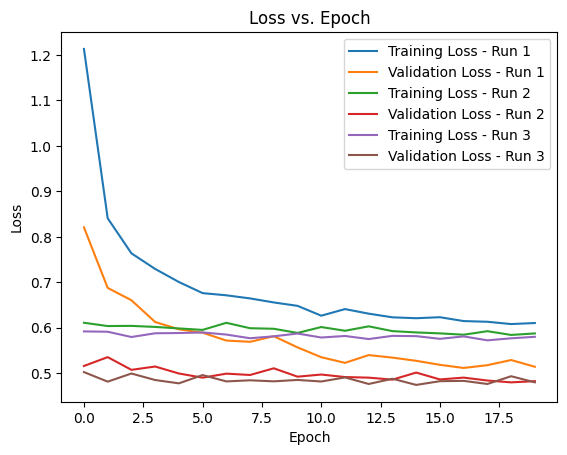

Average Test Accuracy over 3 runs: 82.38%


In [4]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt



#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
criterion = nn.CrossEntropyLoss()
num_epochs = 20
accumulated_test_accuracies = []
num_classes = 12


for run in range(3):
    model.to(device)
    optimizer = optim.SGD(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001, momentum=0.9)

    train_loss_values = []
    val_loss_values = []

    for epoch in range(num_epochs):

        model.train()
        epoch_train_loss = 0.0
        for batch_idx, (data, targets) in enumerate(train_loader):
            data, targets = data.to(device), targets.to(device)

            outputs = model(data)
            loss = criterion(outputs, targets)
            epoch_train_loss += loss.item()

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if batch_idx % 100 == 0:
                print(f'Epoch [{epoch+1}/{num_epochs}], Step [{batch_idx}/{len(train_loader)}], Loss: {loss.item():.4f}')

            torch.cuda.empty_cache()
        avg_train_loss = epoch_train_loss / len(train_loader)
        train_loss_values.append(avg_train_loss)
        print(f'Epoch [{epoch+1}/{num_epochs}], Average Training Loss: {avg_train_loss:.4f}')


        model.eval()
        epoch_val_loss = 0.0
        with torch.no_grad():
            for batch_idx, (data, targets) in enumerate(test_loader):
                data, targets = data.to(device), targets.to(device)

                outputs = model(data)
                loss = criterion(outputs, targets)
                epoch_val_loss += loss.item()
        avg_val_loss = epoch_val_loss / len(test_loader)
        val_loss_values.append(avg_val_loss)
        print(f'Epoch [{epoch+1}/{num_epochs}], Average Validation Loss: {avg_val_loss:.4f}')

    plt.plot(train_loss_values, label=f"Training Loss - Run {run+1}")
    plt.plot(val_loss_values, label=f"Validation Loss - Run {run+1}")

    print("Training complete.")
    model.eval()

    test_loss = 0.0
    correct = 0
    total = 0


    with torch.no_grad():
        for data, targets in test_loader:
            data, targets = data.to(device), targets.to(device)


            outputs = model(data)
            loss = criterion(outputs, targets)
            test_loss += loss.item()


            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

    avg_test_loss = test_loss / len(test_loader)
    test_accuracy = 100 * correct / total
    accumulated_test_accuracies.append(test_accuracy)

    print(f"Run {run+1} Test Accuracy: {test_accuracy:.2f}%")


average_accuracy = sum(accumulated_test_accuracies) / 3

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.show()
print(f"Average Test Accuracy over 3 runs: {average_accuracy:.2f}%")